# Análise exploratória de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../data/raw/data.csv')
dictionary = pd.read_csv('../data/external/dictionary.csv')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Descrição dos dados

**Tips** é um dataset disponível no rdrr.io que foi retirado do livro "Practical Data Analysis: Case Studies in Business Statistics". Feito por um garçom que registrou informações sobre cada gorjeta que recebeu ao longo de um período de alguns meses trabalhando em um restaurante. O conjunto de dados conta com 244 linhas e 7 variáveis, são elas:
- **total_bill:** Valor da conta em dólar
- **tip:** Valor da gorjeta em dólar
- **sex:** Sexo do pagador da conta
- **smoker:** Existência de fumante na festa
- **day:** Dia da semana
- **time:** Horário do dia
- **size:** Tamanho da mesa

### Dicionário de Dados

In [5]:
dictionary

,variavel,descricao,tipo,subtipo
0,total_bill,Valor da conta em dólar,quantitativa,continua
1,tip,Valor da gorjeta em dolár,quantitativa,continua
2,sex,Sexo do pagador da conta,qualitativa,nominal
3,smoker,Fumante na festa,qualitativa,nominal
4,day,Dia da semana,qualitativa,nominal
5,time,Horário do dia,qualitativa,nominal
6,size,Tamanho da mesa,quantitativa,discreta


In [6]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [7]:
df.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

### Dados faltantes:

In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Há 0 dados faltantes no dataset.

---

### Verificando linhas duplicadas:

In [9]:
df.duplicated().sum()

1

#### Removendo linhas duplicadas

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

---

In [59]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243,243,243,243,243.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.813868,3.002387,NaN,NaN,NaN,NaN,2.572016
std,8.910071,1.385002,NaN,NaN,NaN,NaN,0.952356
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.380000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.810000,2.920000,NaN,NaN,NaN,NaN,2.000000
75%,24.175000,3.575000,NaN,NaN,NaN,NaN,3.000000


- O sexo que mais compra são os homens
- O dia mais movimentado é o sabado
- O horário mais movimentado é a noite

## 2. Perguntas de partida e hipóteses

- Qual a relação entre o total da conta e gorjeta recebida ?
- Qual a distribuição das gorjetas ?
- Qual a frequência e valor total de gorjetas de acordo com os dias da semana dos dois sexos ?
- Qual a frequência e valor total de fumantes e não fumantes ?
- Qual a distribuição das gorjetas nos dias da semana ?
- Qual a distribuição das gorjetas nos diferentes horários do dia ?
- Há relação entre o tamanho da mesa e a gorjeta ?

## 3. Insights

### Qual a relação entre o total do pedido e da gorjeta ?

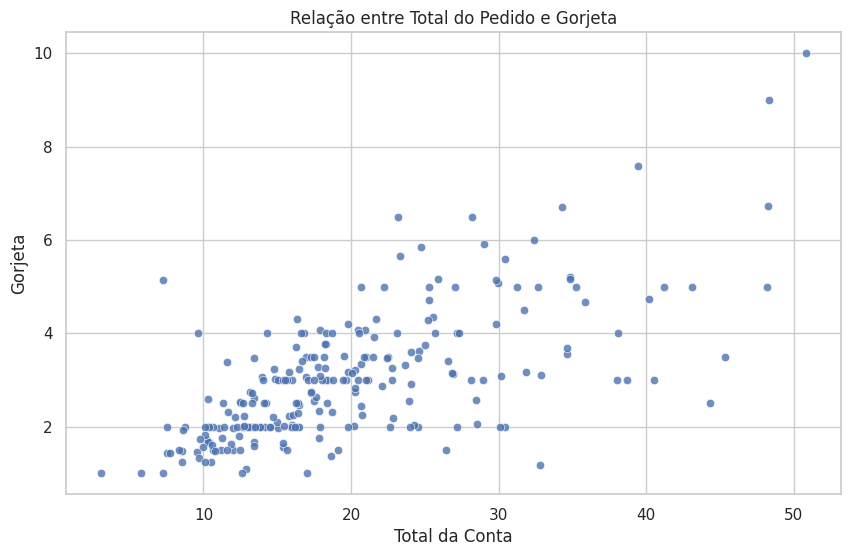

Correlação de Pearson: 0.6749978565456075


In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', palette='cool', alpha=0.8)
plt.title("Relação entre Total do Pedido e Gorjeta")
plt.xlabel("Total da Conta")
plt.ylabel("Gorjeta")
plt.show()

correlacao = df['total_bill'].corr(df['tip'])
print("Correlação de Pearson:", correlacao)

📊**Análise:**  
Não é perfeitamente claro a correlação entre as duas variáveis apenas com o gráfico de dispersão. Parece haver uma tendência entre elas. Usando o coeficiente de correlação de Pearson para medir temos 0.67, significando que há uma correlação moderada entre as variáveis. Isso indica que talvez haja uma politica de gorjeta minima por porcentagem do valor do pedido no restaurante.

---

### Qual a distribuição das gorjetas ?

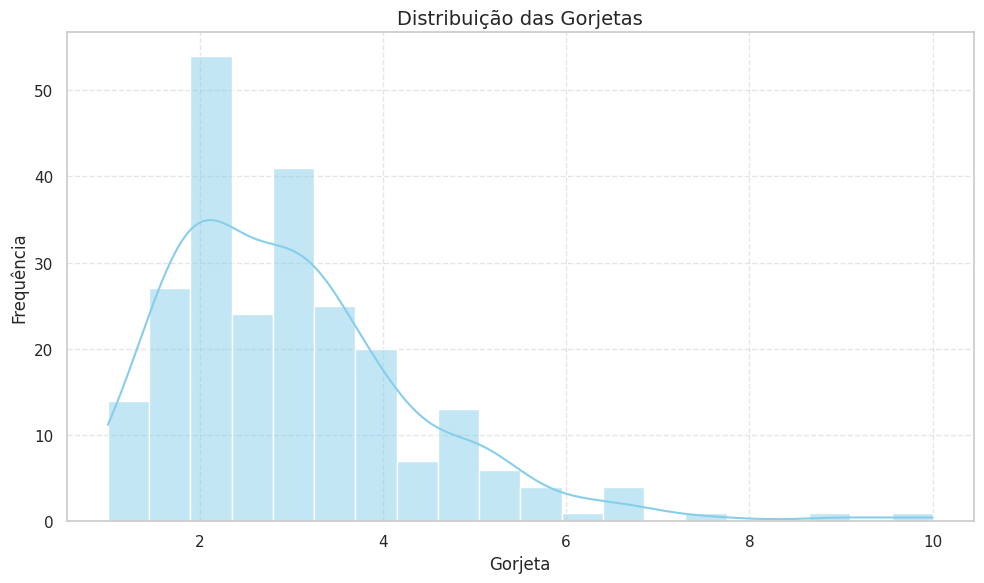

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], bins=20, kde=True, color='skyblue')

plt.title('Distribuição das Gorjetas', fontsize=14)
plt.xlabel('Gorjeta', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

📊**Análise:**  
Pode-se notar que o gráfico se trata de um histograma distorcido à direita. Isso significa que os valores mais altos são raros, dando esse aspecto de concentração dos dados na esquerda do gráfico. A raridade dos valores altos também pode estar relacionado à raridade de contas com preços altos, já que muitas vezes as gorjetas são X% da conta da mesa.

---

### Qual a frequência e valor total de gorjetas de acordo com os dias da semana dos dois sexos ?

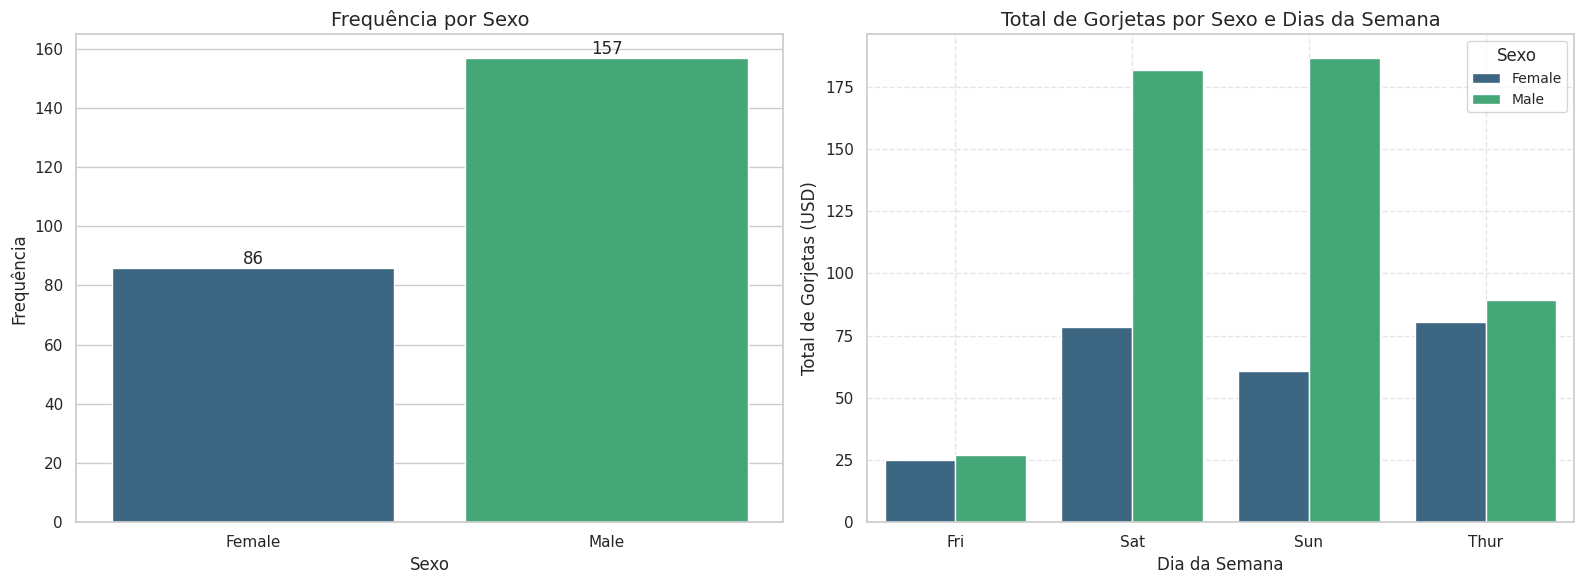

In [80]:
# Configurações iniciais de estilo
sns.set_theme(style="whitegrid")

sex_group = df.groupby('sex').agg({'total_bill': ['sum', 'count']}).reset_index()
sex_group.columns = ['sex', 'total_bill_sum', 'frequency']

total_tips_by_day_sex = df.groupby(['day', 'sex'])['tip'].sum().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

freq_plot = sns.barplot(data=sex_group, x='sex', y='frequency', ax=ax[0], palette='viridis')
ax[0].set_title("Frequência por Sexo", fontsize=14)
ax[0].set_ylabel("Frequência", fontsize=12)
ax[0].set_xlabel("Sexo", fontsize=12)

# Adicionando rótulos no gráfico de frequência
for container in freq_plot.containers:
    ax[0].bar_label(container, fmt='%d', label_type='edge')

sns.barplot(data=total_tips_by_day_sex, x='day', y='tip', hue='sex', ax=ax[1], palette='viridis', ci=None)
ax[1].set_title('Total de Gorjetas por Sexo e Dias da Semana', fontsize=14)
ax[1].set_xlabel('Dia da Semana', fontsize=12)
ax[1].set_ylabel('Total de Gorjetas (USD)', fontsize=12)
ax[1].legend(title='Sexo', title_fontsize=12, fontsize=10)
ax[1].grid(visible=True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

📊**Análise:**  
A frequência de homens é significativamente maior do que das mulheres. Isso indica maior participação dos homens no restaurante onde foram retirados os dados. No gráfico de barras agrupadas, é possivel notar que nos dias de semana (quinta e sexta) há quase uma equivalência no valor total das gorjetas entre homens e mulheres. Enquanto nos finais de semana, o valor total das gorjetas pagas por homens é consideravelmente maior. Isso pode indicar que existem hábitos culturais em que mulheres frequentam mais restaurantes nos dias de semana, enquanto com os homens acontece o contrário.

---

### Qual a frequência e valor total de fumantes e não fumantes ?

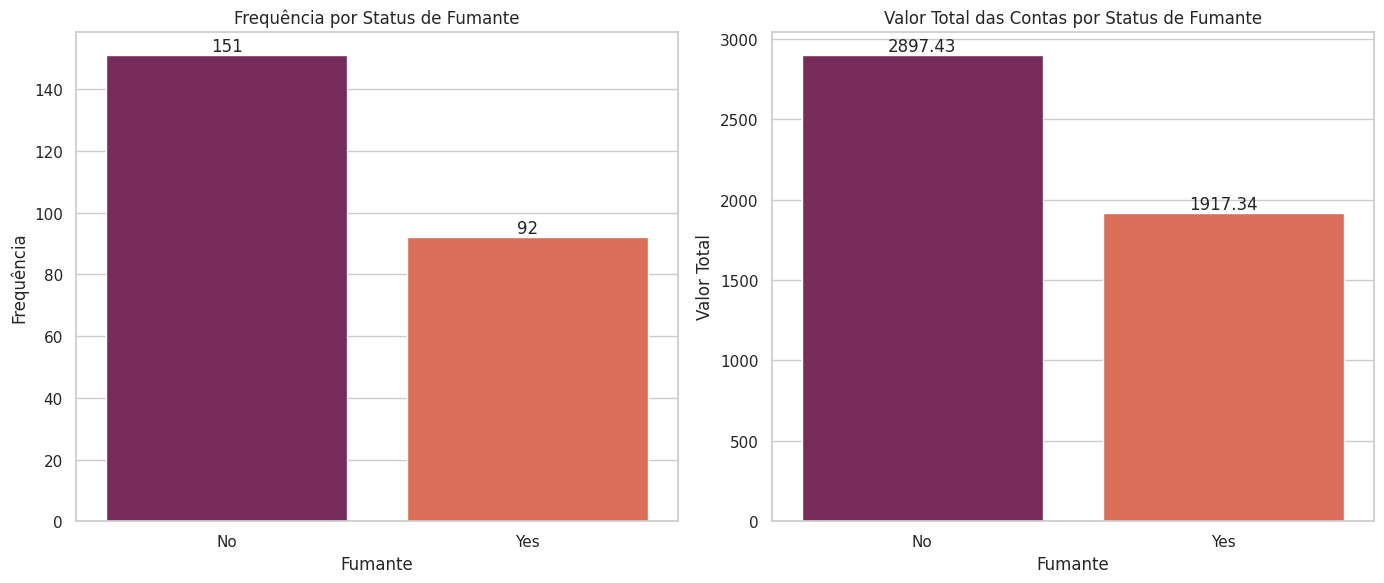

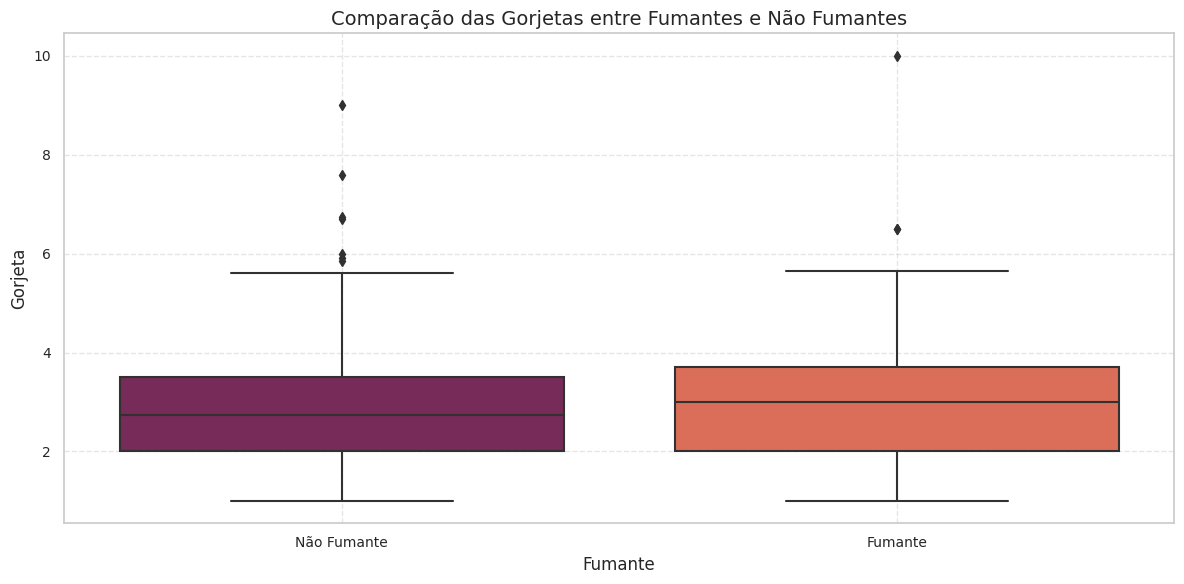

Média das Gorjetas por Tipo de Fumante:
smoker
No     2.991854
Yes    3.019674
Name: tip, dtype: float64
Mediana das Gorjetas por Tipo de Fumante:
smoker
No     2.74
Yes    3.00
Name: tip, dtype: float64


In [82]:
smoker_group = df.groupby('smoker').agg({'total_bill': ['sum', 'count']}).reset_index()
smoker_group.columns = ['smoker', 'total_bill_sum', 'frequency']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

freq_plot = sns.barplot(data=smoker_group, x='smoker', y='frequency', ax=ax[0], palette='rocket')
ax[0].set_title("Frequência por Status de Fumante")
ax[0].set_ylabel("Frequência")
ax[0].set_xlabel("Fumante")

freq_plot.bar_label(freq_plot.containers[0], fmt='%d', label_type='edge')

valortotal_plot = sns.barplot(data=smoker_group, x='smoker', y='total_bill_sum', ax=ax[1], palette='rocket')
ax[1].set_title("Valor Total das Contas por Status de Fumante")
ax[1].set_ylabel("Valor Total")
ax[1].set_xlabel("Fumante")

valortotal_plot.bar_label(valortotal_plot.containers[0], fmt='%.2f', label_type='edge')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='smoker', y='tip', palette='rocket')

plt.title("Comparação das Gorjetas entre Fumantes e Não Fumantes", fontsize=14)
plt.xlabel("Fumante", fontsize=12)
plt.ylabel("Gorjeta", fontsize=12)
plt.xticks([0, 1], ['Não Fumante', 'Fumante'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


media_gorjetas_fumantes = df.groupby('smoker')['tip'].mean()
print("Média das Gorjetas por Tipo de Fumante:")
print(media_gorjetas_fumantes)

mediana_gorjetas_fumantes = df.groupby('smoker')['tip'].median()
print("Mediana das Gorjetas por Tipo de Fumante:")
print(mediana_gorjetas_fumantes)

📊**Análise:**  
Há mais não fumantes do que fumantes frequentando o restaurante. É notável, por meio do gráfico de barras e das médias das gorjetas, que os dois grupos pagam valores muito próximos de gorjeta para o garçom. Porém, o grupo de não fumantes apresenta uma quantidade significante de outliers, fazendo com que sua média, que antes era 0.26 centavos a menos, fique mais próxima do outro grupo.

---

### Qual a distribuição das gorjetas nos dias da semana ?

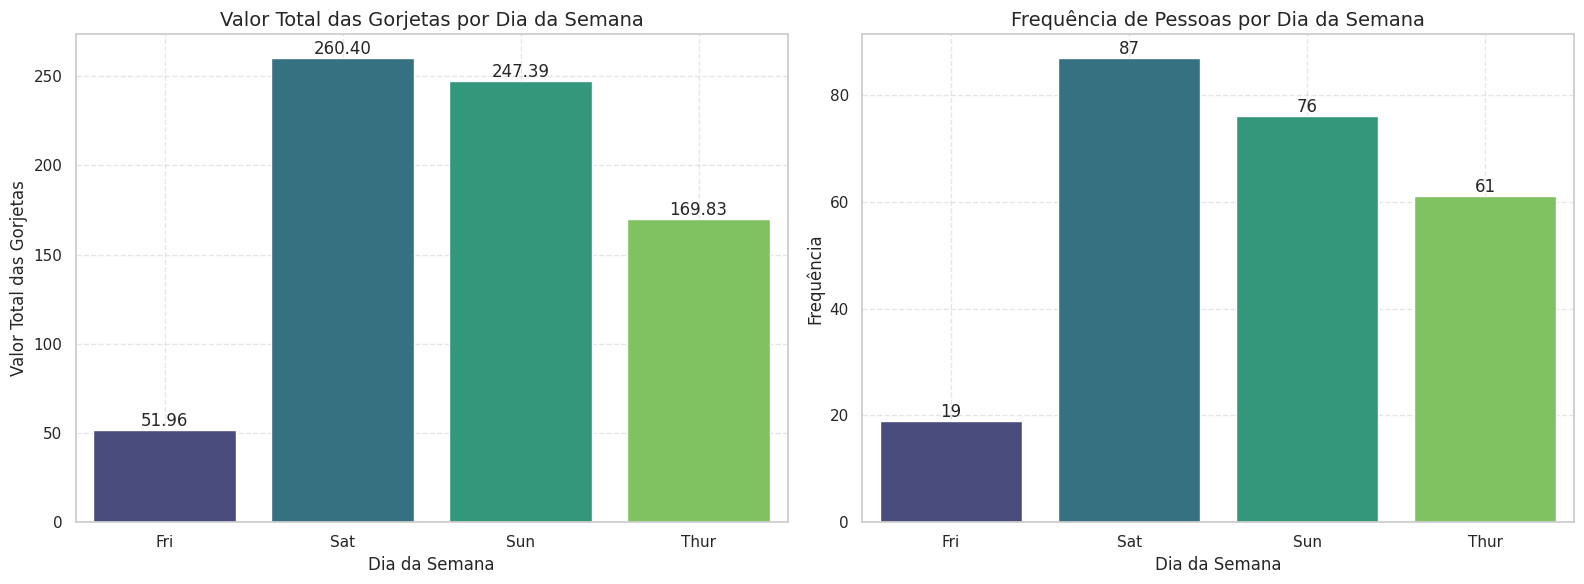

In [74]:
sns.set_theme(style="whitegrid")

freq_by_day = df['day'].value_counts().reset_index()
freq_by_day.columns = ['day', 'frequency']
freq_by_day = freq_by_day.sort_values(by='day')

total_tips_by_day = df.groupby('day')['tip'].sum().reset_index()
total_tips_by_day = total_tips_by_day.sort_values(by='day')

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

sns.barplot(data=total_tips_by_day, x='day', y='tip', palette='viridis', ax=axes[0])
axes[0].set_title("Valor Total das Gorjetas por Dia da Semana", fontsize=14)
axes[0].set_xlabel("Dia da Semana", fontsize=12)
axes[0].set_ylabel("Valor Total das Gorjetas", fontsize=12)
axes[0].grid(visible=True, linestyle='--', alpha=0.5)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', label_type='edge')

sns.barplot(data=freq_by_day, x='day', y='frequency', palette='viridis', ax=axes[1])
axes[1].set_title("Frequência de Pessoas por Dia da Semana", fontsize=14)
axes[1].set_xlabel("Dia da Semana", fontsize=12)
axes[1].set_ylabel("Frequência", fontsize=12)
axes[1].grid(visible=True, linestyle='--', alpha=0.5)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

📊**Análise:**  
Como podemos ver, os dias de final de semana são os que mais pessoas frequentam o restaurante, porém o valor das gorjetas do sabado em comparação com o domingo é consideravelmente próximo. Isso indica que a média das gorjetas do domingo é maior do que as do sabado. Além disso, há alguma razão por trás dessa queda na quantidade de pessoas entre quinta e sexta. O que pode ser explicado por algum costume ou cultura na sexta.

---

### Qual a distribuição das gorjetas nos diferentes horários do dia ?

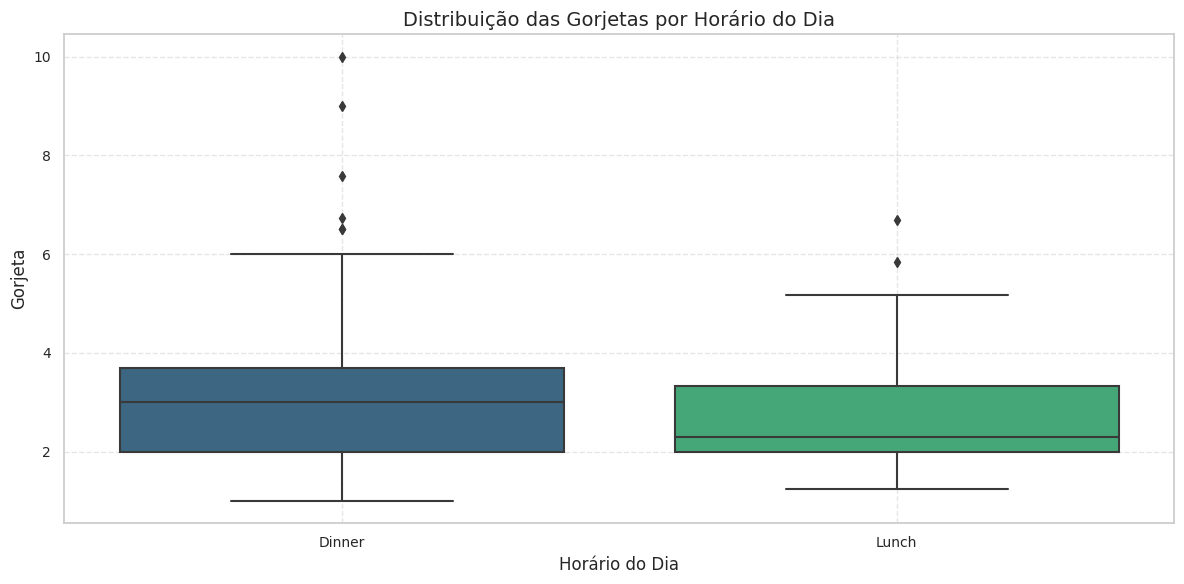

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='time', y='tip', palette='viridis')

plt.title("Distribuição das Gorjetas por Horário do Dia", fontsize=14)
plt.xlabel("Horário do Dia", fontsize=12)
plt.ylabel("Gorjeta", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

📊**Análise:**  
Como observado, há mais gorjetas no horário da janta, podendo significar que mais pessoas frequentam o restaurante nesse horário. Nota-se que há mais outliers no jantar, indicando que nesse período do dia, algumas pessoas costumam dar gorjetas mais elevadas.

---

### Há relação entre o tamanho da mesa e a gorjeta ?

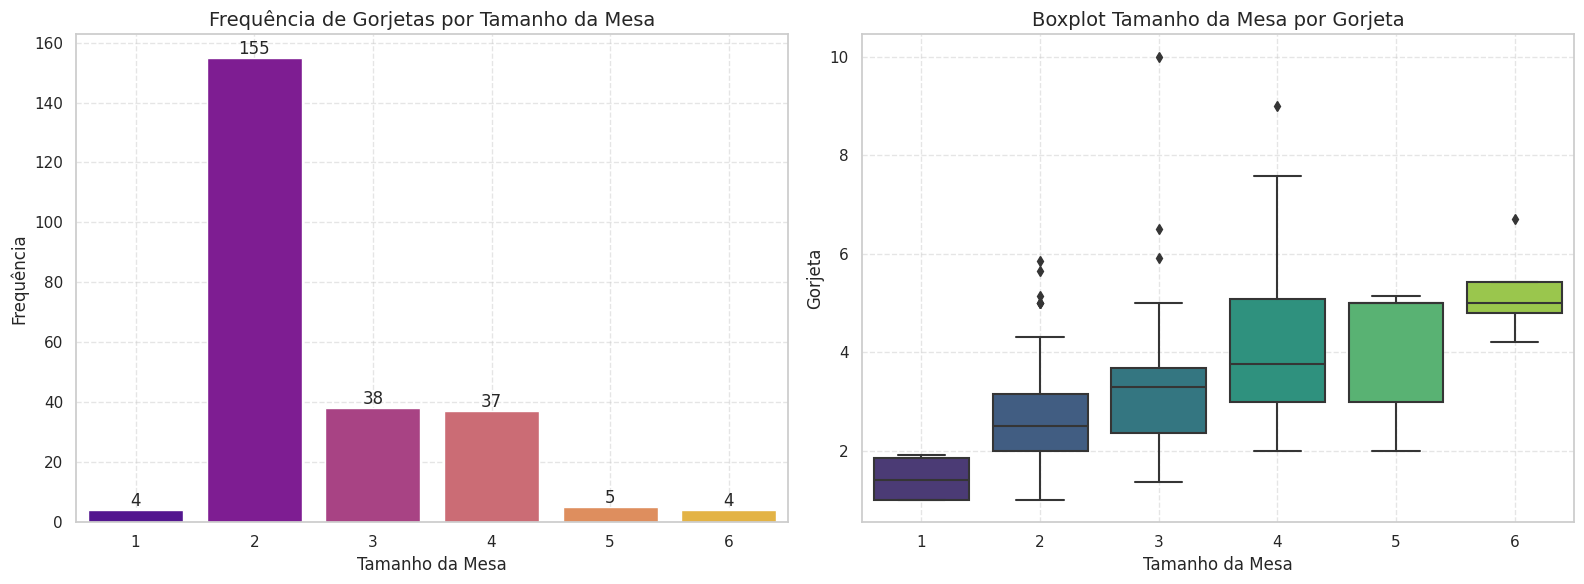

In [72]:
sns.set_theme(style="whitegrid")

freq_by_size = df['size'].value_counts().reset_index()
freq_by_size.columns = ['size', 'frequency']
freq_by_size = freq_by_size.sort_values(by='size')

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

sns.barplot(data=freq_by_size, x='size', y='frequency', palette='plasma', ax=axes[0])
axes[0].set_title("Frequência de Gorjetas por Tamanho da Mesa", fontsize=14)
axes[0].set_xlabel("Tamanho da Mesa", fontsize=12)
axes[0].set_ylabel("Frequência", fontsize=12)
axes[0].grid(visible=True, linestyle='--', alpha=0.5)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')

sns.boxplot(data=df, x='size', y='tip', palette='viridis', ax=axes[1])
axes[1].set_title("Boxplot Tamanho da Mesa por Gorjeta", fontsize=14)
axes[1].set_xlabel("Tamanho da Mesa", fontsize=12)
axes[1].set_ylabel("Gorjeta", fontsize=12)
axes[1].grid(visible=True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [20]:
correlation = df['size'].corr(df['tip'])
print("Correlação entre tamanho da mesa e gorjeta:", correlation)

Correlação entre tamanho da mesa e gorjeta: 0.488400394674884


📊**Análise:**  
O tamanho da mesa mais comum a no restaurante são com duas pessoas. Isso significa que as gorjetas das mesas com duas pessoas irão ter grande impacto nas medidas de tendência central. O coeficiente de correlação de Pearson entre as duas variáveis é 0.48, indicando que há uma correlação moderada entre elas.